# Exercise 18

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('datasets/E18.xlsx')
data.head()

data_with_na=data.dropna()

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import scipy as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

# Exercise 18.1

Analyze the writing patterns of each student

In [3]:
y = data['Sexo']
y.describe()

count     42
unique     2
top        H
freq      34
Name: Sexo, dtype: object

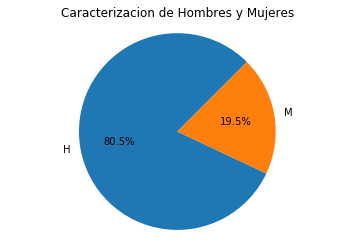

In [4]:
data[["Sexo","T1"]].groupby("Sexo").count()["T1"].plot.pie(autopct='%1.1f%%', label='',startangle=45)
plt.title("Caracterizacion de Hombres y Mujeres")
plt.axis('equal')
plt.show()

Como se puede observar en la grafica anterior el 19.5% de los estudiantes de la maestria para el segundo semetres es de mujeres predominando los Hombres en este curso.

In [5]:
data["T1"].fillna("", inplace=True)
data["T2"].fillna("", inplace=True)
data["T3"].fillna("", inplace=True)
data["T4"].fillna("", inplace=True)
data["T5"].fillna("", inplace=True)
data["T6"].fillna("", inplace=True)
feature_cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
X = data['T1'] + data['T2'] + data['T3'] + data['T4'] + data['T5'] + data['T6']
y = data['Sexo']


X.head()

0    Un científico de datos y un ingeniero de datos...
1    Aunque los dos perfiles cuentan con habilidade...
2    Python vs Stata. Analizar información es un pr...
3    Los algoritmos de machine learning buscan pred...
4    Python vs R para análisis de datos. A pesar de...
dtype: object

In [6]:
list_stopwords_15= {'de','en','la','los','por','y','las','el','al','Un','un','su','sus','tal','le'}

In [7]:
vect = CountVectorizer(lowercase=False ,stop_words = list_stopwords_15)
X_dtm = vect.fit_transform(X)
temp = X_dtm.todense()
print(vect.vocabulary_)

{'científico': 1734, 'datos': 2320, 'ingeniero': 3804, 'tienen': 6051, 'ciertas': 1738, 'habilidades': 3541, 'común': 1953, 'ejemplo': 2780, 'poseen': 4880, 'programación': 5092, 'Sin': 802, 'embargo': 2813, 'están': 3136, 'mucho': 4348, 'más': 4381, 'allá': 1176, 'Hacer': 458, 'que': 5205, 'cree': 2227, 'flujo': 3364, 'está': 3135, 'extremo': 3294, 'alejado': 1151, 'pero': 4776, 'es': 2994, 'pan': 4647, 'cada': 1596, 'día': 2731, 'En': 356, 'general': 3465, 'existen': 3212, 'varias': 6280, 'diferencias': 2590, 'entre': 2950, 'puede': 5179, 'organizar': 4604, 'almacenar': 1180, 'gran': 3514, 'cantidad': 1637, 'Además': 85, 'realizar': 5291, 'análisis': 1256, 'descriptivos': 2485, 'predictivos': 4948, 'prescriptivos': 4983, 'con': 1955, 'fin': 3344, 'resolver': 5484, 'una': 6170, 'necesidad': 4417, 'negocio': 4429, 'generar': 3478, 'valor': 6257, 'compañía': 1879, 'Dentro': 305, 'áreas': 6405, 'conocimiento': 2025, 'matemáticas': 4170, 'estadística': 3078, 'física': 3441, 'investigación

In [8]:
# last 50 features
print(vect.get_feature_names()[-150:-100])

['varible', 'variedad', 'varios', 'various', 'varying', 'varían', 'vaya', 've', 'vean', 'veces', 'vecino', 'vecinos', 'vector', 'vectores', 'vectorial', 'velocidad', 'velocidades', 'veloz', 'ven', 'vencerás', 'venido', 'ventaja', 'ventajas', 'ventas', 'ver', 'verdadero', 'verificar', 'versatilidad', 'verse', 'versiones', 'versión', 'versátil', 'vertebral', 'verticales', 'vertiente', 'vertientes', 'very', 'verá', 'vez', 'viceversa', 'vida', 'videogames', 'videojuegos', 'viendo', 'viene', 'vienen', 'viento', 'vio', 'virtudes', 'visión']


In [9]:
# Palabra más usada
print(vect.get_feature_names()[X_dtm.todense()[0].argmax()])

datos


In [10]:
import warnings
warnings.filterwarnings('ignore')

# Análisis de frases
vect_ngram = CountVectorizer(ngram_range=(2, 3),stop_words = list_stopwords_15)
X_dtm_ngram = vect_ngram.fit_transform(X)


In [11]:
# last 50 features
print(vect_ngram.get_feature_names()[-150:-100])

['óptimo controlando', 'óptimo controlando error', 'óptimo del', 'óptimo del algoritmo', 'óptimo exacto', 'óptimo exacto iteraciones', 'óptimo gradient', 'óptimo gradient boosting', 'óptimo métodos', 'óptimo métodos ensamblaje', 'óptimo para', 'óptimo para buscar', 'óptimo predicción', 'óptimo predicción algoritmo', 'óptimo principio', 'óptimo principio fundamental', 'óptimo toda', 'óptimo toda una', 'óptimos que', 'óptimos que mejor', 'óptimos que permitan', 'última clasificación', 'última clasificación si', 'última generación', 'última generación construcción', 'última metodología', 'última metodología muy', 'última sugerencia', 'última sugerencia sería', 'última versión', 'última versión quinlan', 'últimas decisión', 'últimas decisión sobre', 'últimas décadas', 'últimas décadas obteniendo', 'último acuerdo', 'último acuerdo glassdoor', 'último aprendizajes', 'último aprendizajes es', 'último aunque', 'último aunque se', 'último es', 'último es mayor', 'último escenario', 'último esc

In [12]:
# Frase más usada
print(vect_ngram.get_feature_names()[X_dtm_ngram.todense()[0].argmax()])

ingeniero datos


# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [13]:
def similarity(data):

    results = pd.DataFrame(0, index=data.index, columns=data.index)
    i=0 
    j=1
    for text in data['T2'].iteritems():
        for slicing in data['T2'].iteritems():
            results[text[i]][slicing[i]]=fuzz.ratio(text[j],slicing[j])
        
    
    assert results.shape == (data.shape[0], data.shape[0])
    
    return results

In [14]:
data_with_na.head()

,Sexo,T1,T2,T3,T4,T5,T6
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...
8,H,Uno de los criterios más importantes en la sel...,Dentro de los algoritmos usados para programar...,Los arboles de decisión son estructuras de dat...,"En términos de Machine Learning, Ensemble es l...",El artículo “¿Do we need hundreds of classifie...,"Dentro de los algoritmos de “ensembling”, más ..."
9,H,Diferencia entre un científico de datos y un i...,El aprendizaje de máquinas tiene cuatro grande...,Los tipos de algoritmos y aplicaciones de árbo...,El aprendizaje conjunto es una herramienta que...,Este papper trata de encontrar a través 121 co...,Gradient Boosting su técnica consiste en entre...
13,H,La diferencia entre un data scientist y un dat...,Tipos de machine learning: Supervised Machine ...,Los arboles de decisión son un tipo de algorit...,El uso común de machine learning por sobre otr...,El paper realiza una revisión de algoritmos de...,Gradient Boosting: * Busca optimizar multiples...


In [15]:
similarity(data_with_na)

,2,4,8,9,13,17,18,25,29,31,34,37,39
2,100,46,47,47,45,47,43,49,46,45,49,49,46
4,46,100,48,48,47,48,46,49,48,49,47,48,46
8,47,48,100,48,45,46,48,49,49,47,48,46,47
9,47,48,48,100,46,48,46,48,48,46,46,47,48
13,45,47,45,46,100,45,42,46,45,45,47,45,45
17,47,48,46,48,45,100,41,46,48,44,46,47,47
18,43,46,48,46,42,41,100,46,45,46,42,40,42
25,49,49,49,48,46,46,46,100,48,48,48,48,47
29,46,48,49,48,45,48,45,48,100,46,47,48,47
31,45,49,47,46,45,44,46,48,46,100,46,44,45


In [16]:
similarity(data)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,100,0,0,0,0,100,0,0,0,0,...,100,100,0,0,0,0,100,0,0,0
1,0,100,47,46,47,0,42,44,48,47,...,0,0,48,46,44,46,0,46,48,47
2,0,47,100,45,46,0,43,44,47,47,...,0,0,49,50,45,49,0,46,49,46
3,0,46,45,100,46,0,42,43,45,46,...,0,0,46,44,44,45,0,46,45,46
4,0,47,46,46,100,0,42,45,48,48,...,0,0,47,46,46,48,0,46,47,46
5,100,0,0,0,0,100,0,0,0,0,...,100,100,0,0,0,0,100,0,0,0
6,0,42,43,42,42,0,100,41,42,42,...,0,0,43,43,41,43,0,43,43,43
7,0,44,44,43,45,0,41,100,43,45,...,0,0,44,45,45,46,0,45,45,45
8,0,48,47,45,48,0,42,43,100,48,...,0,0,48,46,45,46,0,47,49,47
9,0,47,47,46,48,0,42,45,48,100,...,0,0,46,47,46,47,0,48,49,46


# Exercise 18.3

Create a classifier to predict the sex of each student



In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
# PREDICT SEX

# define a function that accepts a vectorizer and calculates the accuracy

def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())


In [ ]:
# Tests
vect = CountVectorizer(ngram_range=(3, 4))
print(tokenize_test(vect))  # Análisis examinando conjuntos de 3 a 4 palabras
print(tokenize_test(vect_ngram))  # Análisis examinando de a 1 palabra, considerando minúsculas

Features:  98990
